# Welcome! To **LINK lab** customized spike sorter

In [1]:
data_dir = r"C:\Users\user\sean\experiment_data\241111 invivo\241113 11am\241113 11_10am_241113_111032\241113 11_10am_241113_111332.rhd"
filename=data_dir.split("\\")[-1]
output_dir = data_dir.replace(filename,filename.split(".")[0] + "_analysis_kilosort4")
output_dir_bin = data_dir.replace(filename,filename.split(".")[0] + "_analyzer_KS4_binary")

## Step 1: First we need to design the Probe. 

The design of the shank should be same as the real shank used for invivo

In [2]:
from probe import probe
from probeinterface import Probe
from probeinterface.plotting import plot_probe
import matplotlib.pyplot as plt # type: ignore
from pprint import pprint
import numpy as np # type: ignore

Probe - 8ch - 1shanks


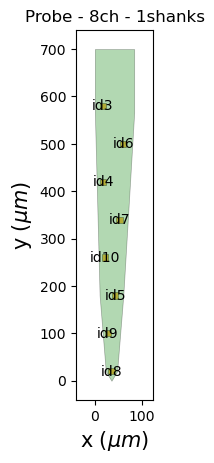

In [3]:
plot_probe(probe, with_contact_id=True)
plt.show()

In [4]:
print(probe.device_channel_indices)

None


(<matplotlib.collections.PolyCollection at 0x184aed420d0>,
 <matplotlib.collections.PolyCollection at 0x184ac6ab4d0>)

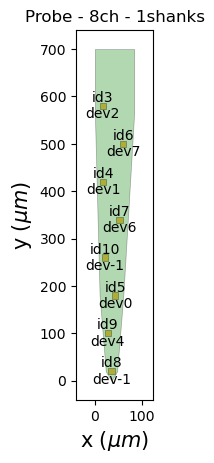

In [5]:
dev_indices = np.array([-1,20,8,-1,22,9,23,10])
dev_indices = np.array([-1,4,0,-1,6,1,7,2])

probe.set_device_channel_indices(dev_indices)
plot_probe(probe, with_contact_id=True, with_device_index=True)

## Import Intanfiles

In [6]:
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

In [7]:
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [8]:
recording = se.read_intan(data_dir, stream_name='RHD2000 amplifier channel')
recording = recording.set_probe(probe=probe)
print(recording)

ChannelSliceRecording: 6 channels - 20.0kHz - 1 segments - 3,600,000 samples 
                       180.00s (3.00 minutes) - uint16 dtype - 41.20 MiB


c:\Users\user\anaconda3\envs\si_env\Lib\site-packages\spikeinterface\core\baserecordingsnippets.py:164: UserWarning: The given probes have unconnected contacts: they are removed
  warn("The given probes have unconnected contacts: they are removed")


269.392822265625


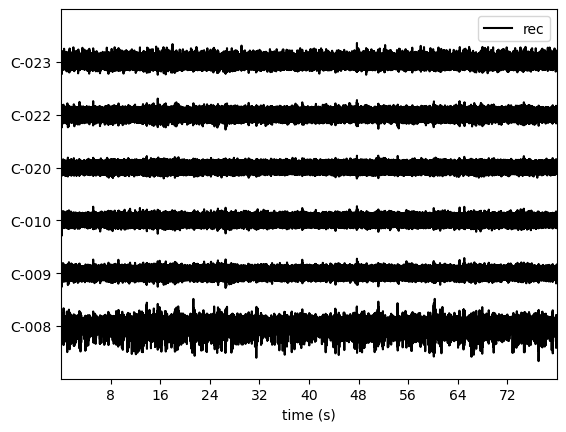

In [9]:
w_ts = sw.plot_traces(recording, time_range=(0, 80), show_channel_ids=True, return_scaled=True)

In [10]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

Channel ids: ['C-008' 'C-009' 'C-010' 'C-020' 'C-022' 'C-023']
Sampling frequency: 20000.0
Number of channels: 6
Number of segments: 1


In [11]:
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_f = spre.notch_filter(recording_f, freq=60)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")
print(recording_cmr)

# this computes and saves the recording after applying the preprocessing chain
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)

CommonReferenceRecording: 6 channels - 20.0kHz - 1 segments - 3,600,000 samples 
                          180.00s (3.00 minutes) - int16 dtype - 41.20 MiB
Use cache_folder=C:\Users\user\AppData\Local\Temp\spikeinterface_cache\tmpowyn5h50\ULT37LUL
write_binary_recording 
n_jobs=4 - samples_per_chunk=20,000 - chunk_memory=234.38 KiB - total_memory=937.50 KiB - chunk_duration=1.00s


write_binary_recording:   0%|          | 0/180 [00:00<?, ?it/s]

BinaryFolderRecording: 6 channels - 20.0kHz - 1 segments - 3,600,000 samples 
                       180.00s (3.00 minutes) - int16 dtype - 41.20 MiB


In [12]:
print("Available sorters", ss.available_sorters())
print("Installed sorters", ss.installed_sorters())

Available sorters ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'klusta', 'mountainsort4', 'mountainsort5', 'pykilosort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters ['kilosort4', 'simple', 'spykingcircus2', 'tridesclous', 'tridesclous2']


In [13]:
print("kilosort4 params:")
pprint(ss.get_default_sorter_params("kilosort4"))

kilosort4 params:
{'Th_learned': 8,
 'Th_single_ch': 6,
 'Th_universal': 9,
 'acg_threshold': 0.2,
 'artifact_threshold': None,
 'bad_channels': None,
 'batch_size': 60000,
 'binning_depth': 5,
 'ccg_threshold': 0.25,
 'clear_cache': False,
 'cluster_downsampling': 20,
 'cluster_pcs': 64,
 'delete_recording_dat': True,
 'dmin': None,
 'dminx': 32,
 'do_CAR': True,
 'do_correction': True,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'duplicate_spike_ms': 0.25,
 'highpass_cutoff': 300,
 'invert_sign': False,
 'keep_good_only': False,
 'max_channel_distance': None,
 'min_template_size': 10,
 'n_pcs': 6,
 'n_templates': 6,
 'nblocks': 1,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'nskip': 25,
 'nt': 61,
 'nt0min': None,
 'save_extra_vars': False,
 'save_preprocessed_copy': False,
 'scale': None,
 'scaleproc': None,
 'shift': None,
 'sig_interp': 20,
 'skip_kilosort_preprocessing': False,
 'template_sizes': 5,
 'templates_from_data': True,
 'torch_device': 'auto',
 'use_binary_file': None,


In [14]:
sorting = ss.run_sorter(sorter_name="kilosort4", 
                        recording=recording_preprocessed, 
                        verbose=True, 
                        folder=output_dir, 
                        remove_existing_folder=True)

c:\Users\user\anaconda3\envs\si_env\Lib\site-packages\kilosort\run_kilosort.py:377: UserWarning: 
            Parameter `nearest_chans` must be less than or equal to the number 
            of data channels being sorted.

            Changing from 10 to 6.
            
  warnings.warn(msg, UserWarning)
INFO:kilosort.run_kilosort: 
INFO:kilosort.run_kilosort:Computing preprocessing variables.
INFO:kilosort.run_kilosort:----------------------------------------
INFO:kilosort.run_kilosort:N samples: 3600000
INFO:kilosort.run_kilosort:N seconds: 180.0
INFO:kilosort.run_kilosort:N batches: 60
INFO:kilosort.run_kilosort:Preprocessing filters computed in  0.17s; total  0.18s
INFO:kilosort.run_kilosort: 
INFO:kilosort.run_kilosort:Resource usage after preprocessing
INFO:kilosort.run_kilosort:********************************************************
INFO:kilosort.run_kilosort:CPU usage:     2.20 %
INFO:kilosort.run_kilosort:Memory:       49.52 %     |     15.74   /    31.79 GB
INFO:kilosort.run_k

kilosort4 run time 6.20s


In [15]:
print(sorting)


KiloSortSortingExtractor: 7 units - 1 segments - 20.0kHz


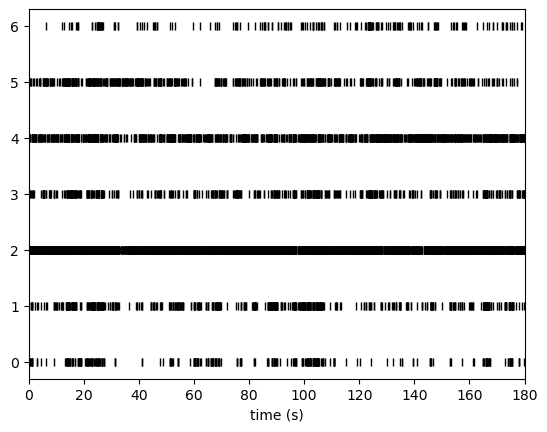

In [16]:
raster = sw.plot_rasters(sorting, markersize=6,time_range=[0,180])

In [17]:
analyzer_KS4 = si.create_sorting_analyzer(sorting=sorting, recording=recording_preprocessed, format='binary_folder', folder=output_dir_bin, overwrite=True)


estimate_sparsity:   0%|          | 0/180 [00:00<?, ?it/s]

c:\Users\user\anaconda3\envs\si_env\Lib\site-packages\spikeinterface\core\basesorting.py:264: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


In [18]:
analyzer_KS4.compute("random_spikes")
analyzer_KS4.compute("waveforms")

compute_waveforms:   0%|          | 0/180 [00:00<?, ?it/s]

In [19]:
unit_id0 = analyzer_KS4.unit_ids[0]
waveforms = analyzer_KS4.get_extension("waveforms").get_data()[unit_id0]
print(waveforms.shape)

(60, 3)


In [20]:
unit_id0 = analyzer_KS4.unit_ids[0]
waveforms = analyzer_KS4.get_extension("waveforms").get_data()[unit_id0]
print(waveforms.shape)

(60, 3)


In [21]:
analyzer_KS4.compute("noise_levels")
analyzer_KS4.compute("templates")
analyzer_KS4.compute("spike_amplitudes")

spike_amplitudes:   0%|          | 0/180 [00:00<?, ?it/s]

In [22]:
analyzer_KS4.compute("unit_locations", method="center_of_mass")
analyzer_KS4.compute("spike_locations", ms_before=0.5)
analyzer_KS4.compute("correlograms", bin_ms=0.1)
analyzer_KS4.compute("template_similarity", method="cosine_similarity")
analyzer_KS4.compute(
    input="isi_histograms",
    window_ms=10,
    bin_ms=1.0,
    method="auto"
)

spike_locations:   0%|          | 0/180 [00:00<?, ?it/s]

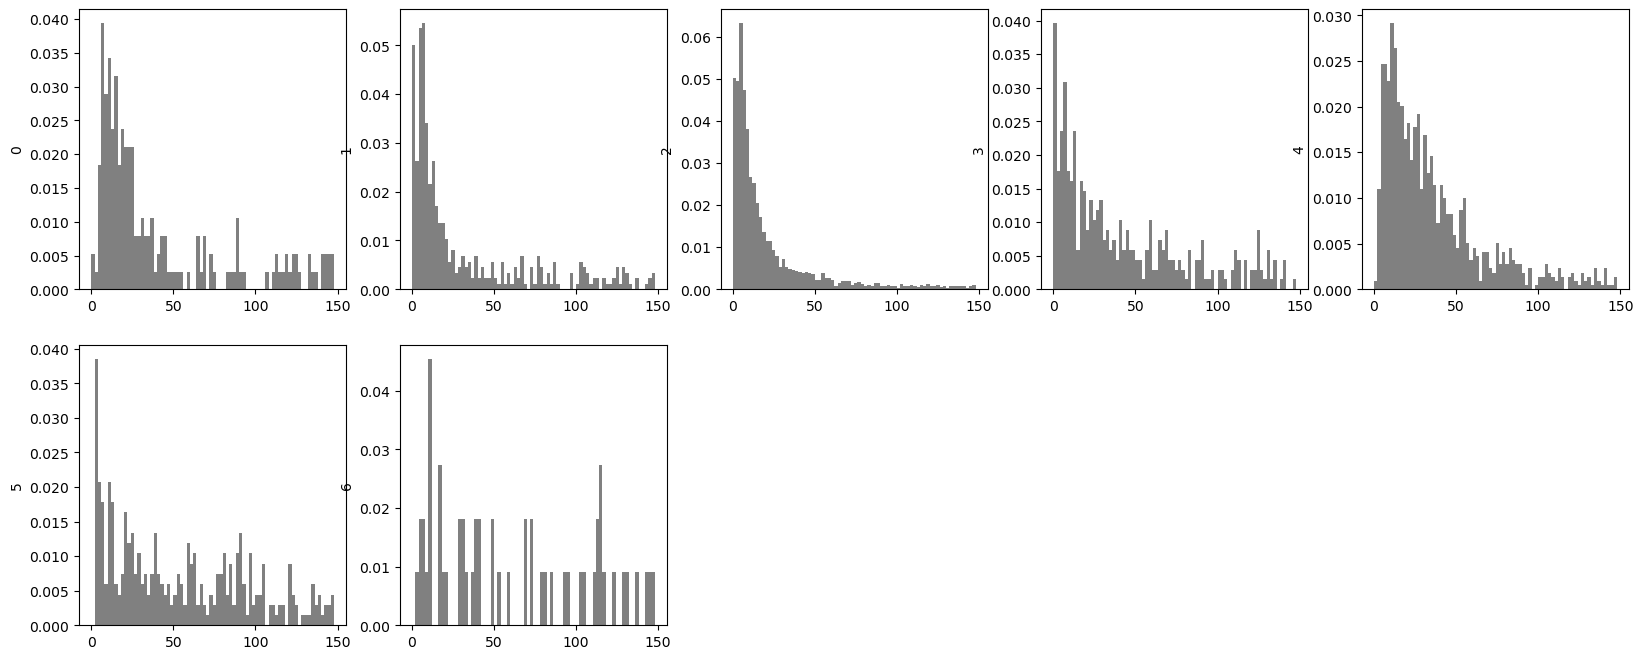

In [23]:
w_isi = sw.plot_isi_distribution(sorting, window_ms=150.0, bin_ms=2.0, figsize=(20, 8))




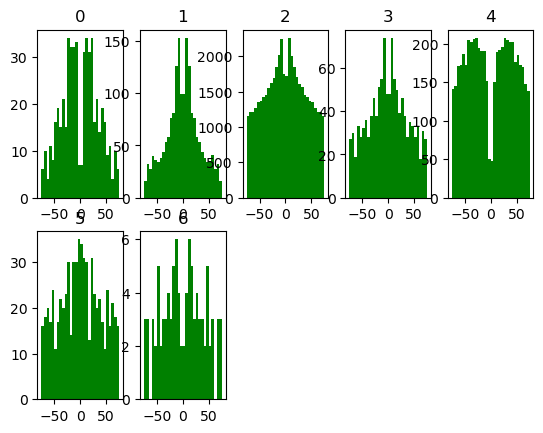

In [24]:
w_ach = sw.plot_autocorrelograms(sorting, window_ms=150.0, bin_ms=5.0) 

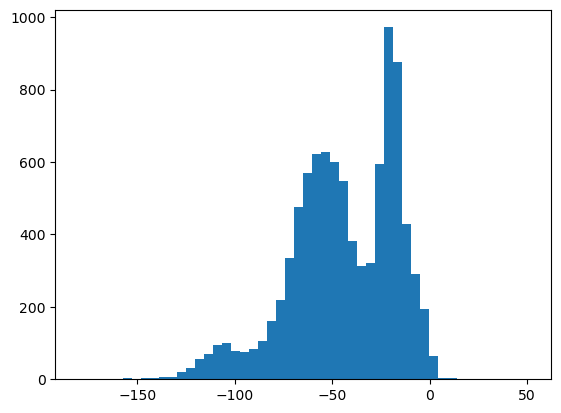

In [25]:
amplitudes = analyzer_KS4.get_extension("spike_amplitudes").get_data()
plt.hist(amplitudes, bins=50)
plt.show()

In [26]:
print(analyzer_KS4.get_saved_extension_names())
print(analyzer_KS4.get_loaded_extension_names())

['correlograms', 'isi_histograms', 'noise_levels', 'random_spikes', 'spike_amplitudes', 'spike_locations', 'templates', 'template_similarity', 'unit_locations', 'waveforms']
['random_spikes', 'waveforms', 'noise_levels', 'templates', 'spike_amplitudes', 'unit_locations', 'spike_locations', 'correlograms', 'template_similarity', 'isi_histograms']


In [27]:
noise = analyzer_KS4.get_extension("noise_levels").get_data()
print(noise)

[4.3366113 2.8910742 2.8910742 3.1801817 3.1801817 3.1801817]


In [28]:
unit_ids = sorting.unit_ids
print(unit_ids)

# sw.plot_unit_waveforms(analyzer_KS4, unit_ids=unit_ids, figsize=(16, 4))

[0 1 2 3 4 5 6]


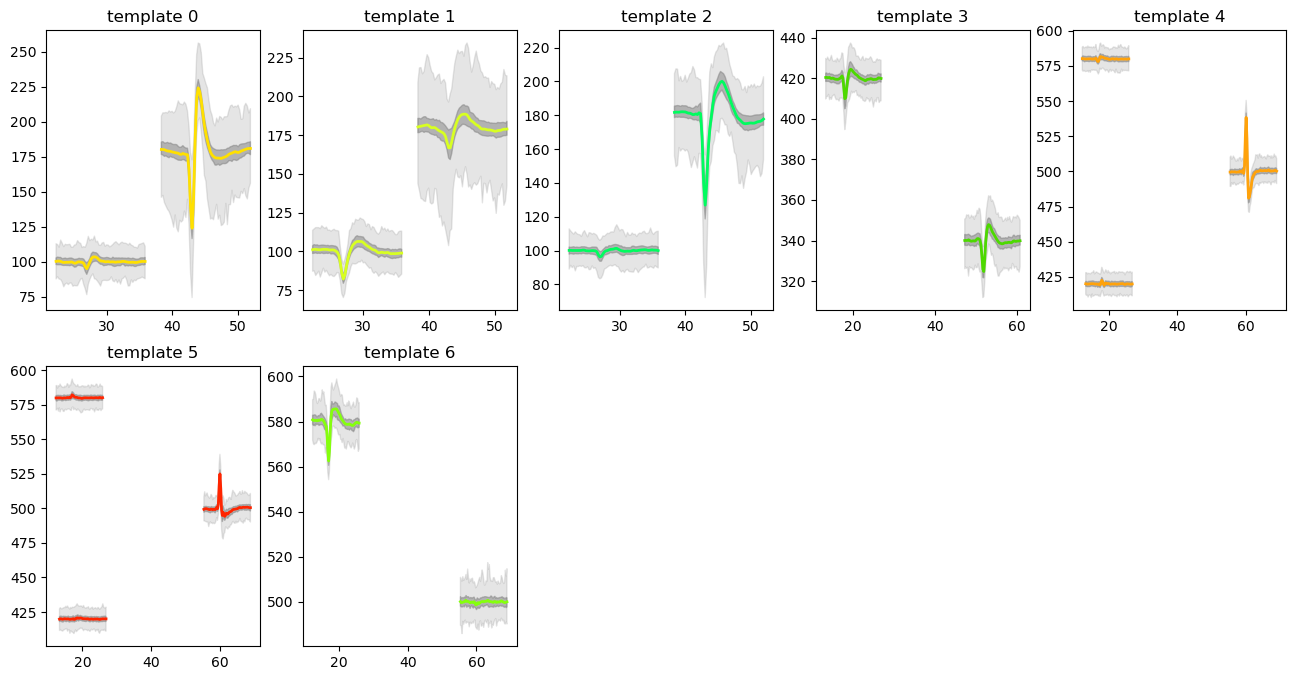

In [29]:
unit_ids = sorting.unit_ids[:]

sw.plot_unit_templates(analyzer_KS4, unit_ids=unit_ids, ncols=5, figsize=(16, 8))

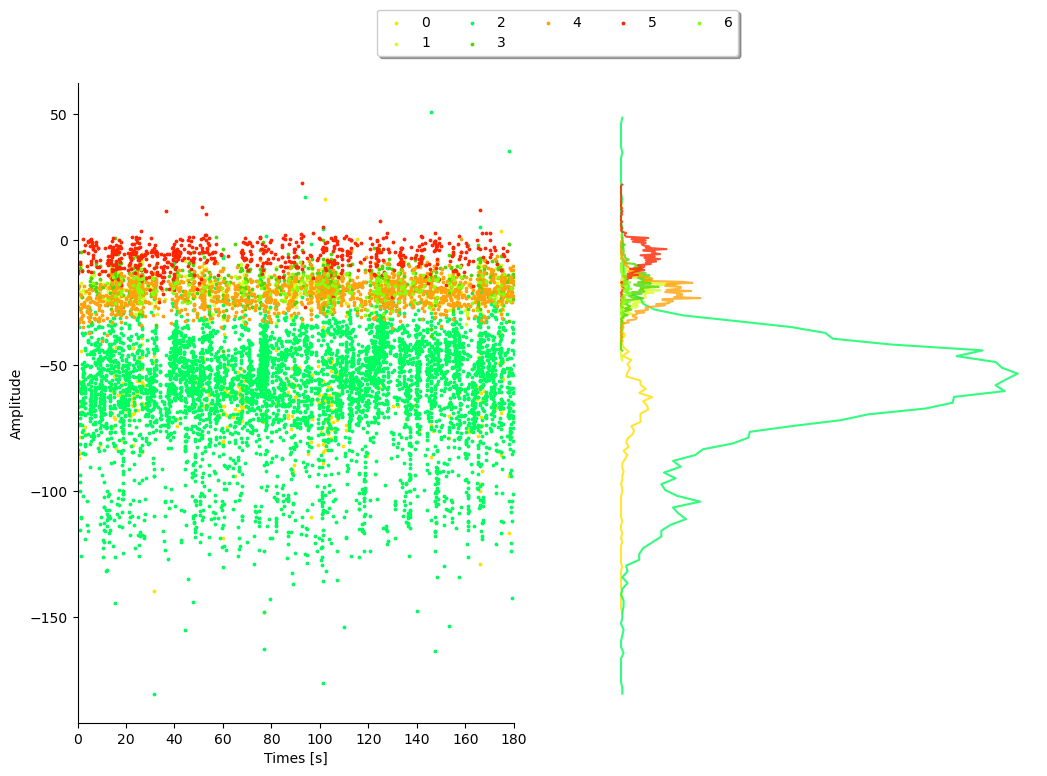

In [30]:
sw.plot_amplitudes(analyzer_KS4, plot_histograms=True, figsize=(12, 8))


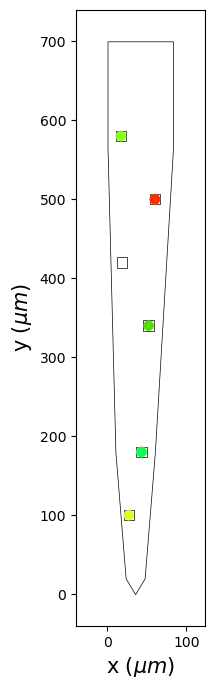

In [31]:
sw.plot_unit_locations(analyzer_KS4, figsize=(4, 8))


In [32]:
ext_wf = analyzer_KS4.get_extension("waveforms")
for unit_id in analyzer_KS4.unit_ids:
    wfs = ext_wf.get_waveforms_one_unit(unit_id)
    print(unit_id, ":", wfs.shape)

ext_templates = analyzer_KS4.get_extension("templates")

av_templates = ext_templates.get_data(operator="average")
print(av_templates.shape)

0 : (319, 60, 2)
1 : (500, 60, 2)
2 : (500, 60, 2)
3 : (500, 60, 2)
4 : (500, 60, 3)
5 : (500, 60, 3)
6 : (209, 60, 2)
(7, 60, 6)


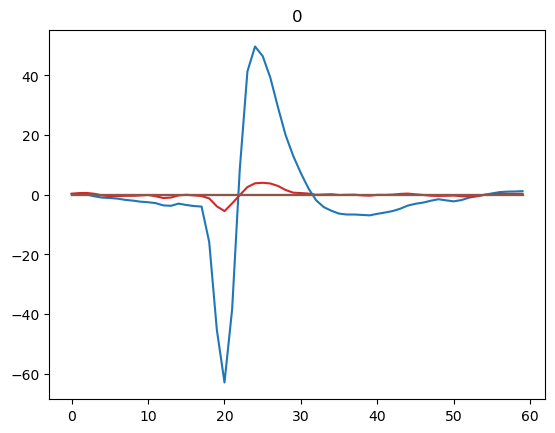

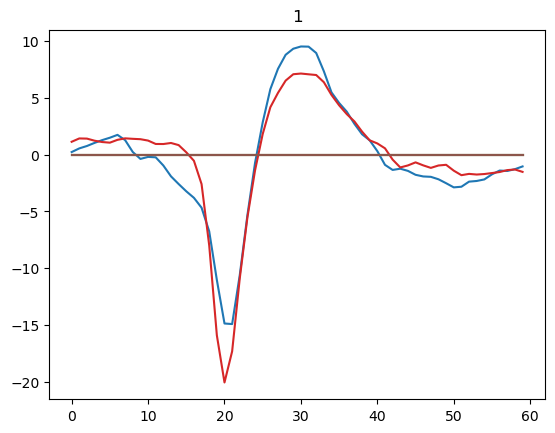

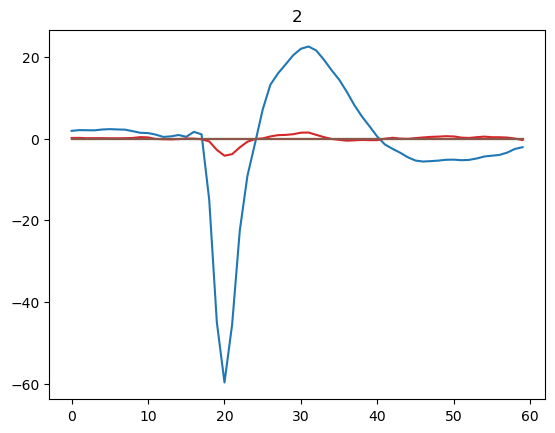

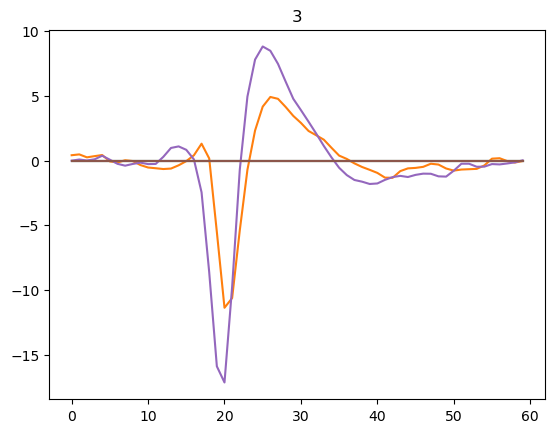

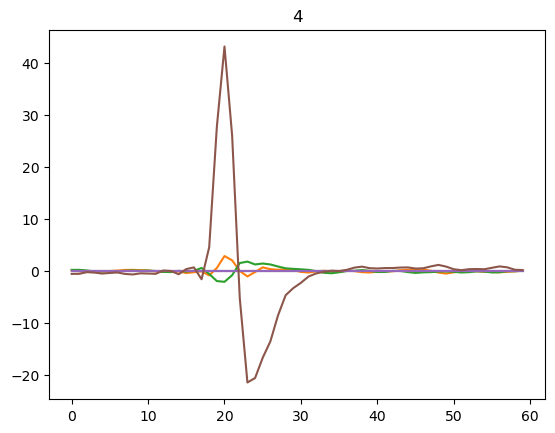

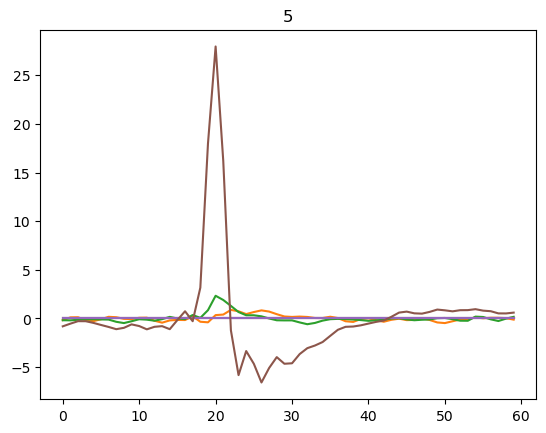

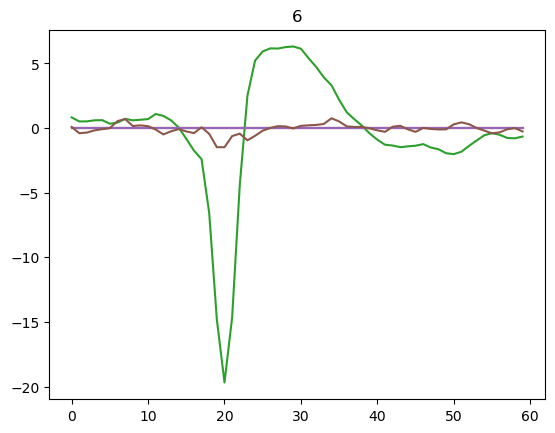

In [33]:
for unit_index, unit_id in enumerate(analyzer_KS4.unit_ids):
    fig, ax = plt.subplots()
    template = av_templates[unit_index]
    ax.plot(template)
    ax.set_title(f"{unit_id}")

In [34]:
import spikeinterface_gui
# This creates a Qt app
app = spikeinterface_gui.mkQApp() 
# reload the SortingAnalyzer
sorting_analyzer = si.load_sorting_analyzer(output_dir_bin)
# create the mainwindow and show
win = spikeinterface_gui.MainWindow(sorting_analyzer)
win.show()
# run the main Qt6 loop
app.exec_()

C:\Users\user\AppData\Local\Temp\ipykernel_11356\2532187721.py:10: DeprecationWarning: 'exec_' will be removed in the future. Use 'exec' instead.
  app.exec_()


0